<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта</a></span></li><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Приоритизация-гипотез" data-toc-modified-id="Приоритизация-гипотез-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Приоритизация гипотез</a></span></li><li><span><a href="#Проведение-A/B---тестов" data-toc-modified-id="Проведение-A/B---тестов-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проведение A/B - тестов</a></span></li><li><span><a href="#Общие-выводы" data-toc-modified-id="Общие-выводы-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общие выводы</a></span></li></ul></div>

## Описание проекта

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.<br>
**Задача по приоретизации данных:**
- Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.<br>

**Анализ A/B-теста:**
- Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
- Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
- Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
- Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.
- Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.
- Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
- Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
- Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
- Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
- Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и - предположения.
- Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
- Примите решение по результатам теста и объясните его.

## Загрузка данных

In [1]:
#импорт библиотек для работы
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from datetime import datetime, timedelta
from scipy import stats as st

In [2]:
#cнизим размерность чисел для вывода на экран на всем проекте
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
# загрузка датасета
try:
    visitors = pd.read_csv('visitors.csv')
    orders = pd.read_csv('orders.csv')
    hypothesis = pd.read_csv('hypothesis.csv')
except:
    visitors = pd.read_csv('/datasets/visitors.csv')
    orders = pd.read_csv('/datasets/orders.csv')
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')

## Анализ данных

Рассмотрим содержимое датасетов

In [4]:
display(visitors.head(5))
visitors.info()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [5]:
display(orders.head(5))
orders.info()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [6]:
display(hypothesis.head(5))
hypothesis.info()

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [7]:
# переведем даты в формат datetime
visitors['date'] = visitors['date'].map(
    lambda x: datetime.strptime(x, '%Y-%m-%d'))
orders['date'] = orders['date'].map(
    lambda x: datetime.strptime(x, '%Y-%m-%d'))

In [8]:
display(visitors.info())
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [9]:
#проверим количество записей с пользователями группы А и В и количество таких пользователей
visitors_dub = (orders[orders['group'] == 'A'][['visitorId','group']]
             .merge(orders[orders['group'] == 'B'][['visitorId','group']], on='visitorId')
            )
display(visitors_dub.shape[0])
visitors_dub.drop_duplicates(subset='visitorId').shape[0]

183

58

Количество записей, относящихся к пользователям попавшим в группы А и В равно 183 и составляет ~15% записей. Такие дубликаты будут вносить ошибку в результаты тестирования. Необходимо очистить таблицу от таких пользователей.

In [10]:
orders = orders[~orders['visitorId'].isin(visitors_dub['visitorId'].drop_duplicates())]
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1016 non-null   int64         
 1   visitorId      1016 non-null   int64         
 2   date           1016 non-null   datetime64[ns]
 3   revenue        1016 non-null   int64         
 4   group          1016 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 47.6+ KB


###### Вывод:
- загружены библиотеки необходимые для работы и предоставленные для анализа датасеты;
- просмотрено и изучено содержимое датасетов;
- изменен формат колонок с датами, приведены к формату datetime;
- данные очищены от дубликатов.

## Приоритизация гипотез

In [11]:
#изменим формат для вывода, чтобы прочитать гипотезы полностью
pd.options.display.max_colwidth = 150
hypothesis['Hypothesis']

0              Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
1                                       Запустить собственную службу доставки, что сократит срок доставки заказов
2    Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
3             Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар
4                                Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей
5                        Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов
6            Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию
7                Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
8                                                         Запустить акцию, дающую скидку

In [12]:
# проведем расчет значение для определения баллов по ICE и RICE 
hypothesis['ice'] = (hypothesis['Impact']*hypothesis['Confidence'])/(hypothesis['Efforts'])
hypothesis['rice'] = (hypothesis['Reach']*hypothesis['Impact']
                      *hypothesis['Confidence'])/(hypothesis['Efforts'])

In [13]:
# отсортируем по убыванию метрики ICE
hypothesis.sort_values(by='ice', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ice,rice
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.00
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.00
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.00
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.00
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.00


In [14]:
# отсортируем по убыванию метрики RICE
hypothesis.sort_values(by='rice', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ice,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.00
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.00
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.00
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.20
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.00
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.00


###### Выводы:
- согласно метода ICE, наиболее важной гипотезой является гипотеза о необходимости запустить акцию, дающую скидку на товар в день рождения, однако, в связи с тем, что изменение затронет минимальное количество пользователей, по методике RICE данное нововведение занимает середину списка;
- согласно методики RICE, гипотеза о добавлении формы подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок затрагивает всех пользователей сайта, поэтому оценка у данной гипотезы выше. Но и согласно методики ICE данное предположение находится в топ-3, значит стоит рассматривать её одной из первых;
- так же в оба топ-3 вошла гипотеза о добавлении двух новых каналов привлечения трафика, что позволит привлекать на 30% больше пользователей, она затрагивает не так много пользователей, но вносит хороший impact при высокой уверенности в результате;
- с учетом того, что 2 гипотезы вошли в топ-3 - следует остановится на них. Начать стоить с добавления каналов привлечения траффика, поскольку даст новых пользователей, при этом оставит старых без изменений, далее уже собирать базу клиентов для e-mail рассылки. 

## Проведение A/B - тестов

Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

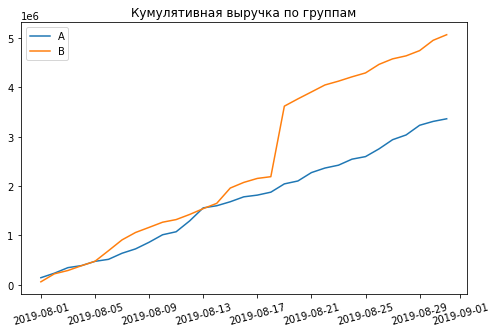

In [15]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах
ordersAggregated = datesGroups.apply(
    lambda x: orders[np.logical_and(
        orders['date'] <= x['date'], orders['group'] == x['group'])].agg(
        {'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}),
    axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[np.logical_and(
        visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg(
        {'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), 
    axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.subplots(figsize=(8, 5))

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.xticks(rotation=15)
plt.title('Кумулятивная выручка по группам')
plt.legend();

В среднем выручка в группе В больше, чем в группе А, однако в период 18.08-20.08 произошел резкий скачок выручки, что сильно искажает дальнейший прогноз и общие выводы. Это может быть связано с аномальными покупками единичных пользователей, необходимо оценить это в дальнейшем.

<div class="alert alert-success">
  
  <b>Комментарий ревьюера</b>
    
  ✔️ График построен верно и можем зафиксировать аномалию в группе В.
</div>

---

Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

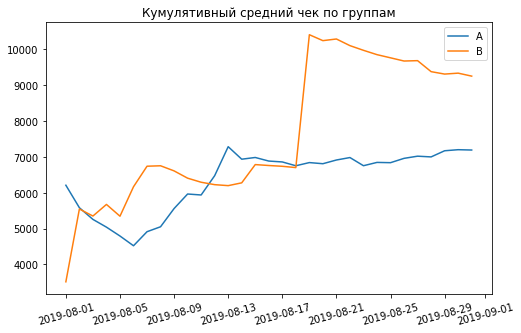

In [16]:
#для построения графика среднего чека разделим выручку на количество заказов
plt.subplots(figsize=(8, 5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('Кумулятивный средний чек по группам')
plt.xticks(rotation=15)
plt.legend();

Средний чек в группе В так же больше, чем в группе А. Но так же резкий скачок в размере среднего чека в период 18.08-20.08  искажает дальнейший прогноз и общие выводы. Аномалия совпадает с графиком выручки, значит это связано с аномальными покупками единичных пользователей, а не резким увеличением количества покупателей.

<div class="alert alert-success">
  
  <b>Комментарий ревьюера</b>
    
  ✔️ Да, тут так-же группа В выделяется.
</div>

---

Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

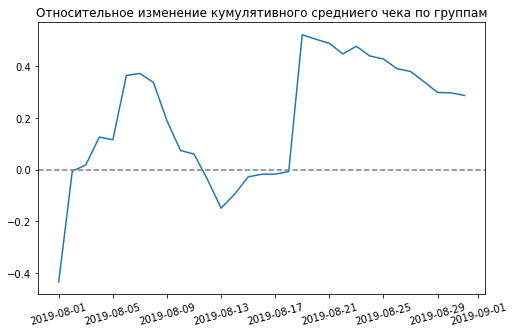

In [17]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(
    cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.subplots(figsize=(8,5))
plt.plot(mergedCumulativeRevenue['date'],
         (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/
         (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='grey', linestyle='--')
plt.xticks(rotation=15)
plt.title('Относительное изменение кумулятивного средниего чека по группам');


Относительное изменение кумулятивного средниего чека по группам так же , как отметили по результату построения ранее, показывает средний чек в группе В в среднем больше, чем в группе А. Резкий скачок в размере среднего чека в период 18.08-20.08  искажает дальнейший прогноз и общие выводы. На данном графике так же выделяется резкое снижение изменения кумулятивного среднего чека 09.08, что тоже следует  учесть в будущем анализе.

---

Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.

Text(0.5, 1.0, 'Кумулятивна конверсия по группам')

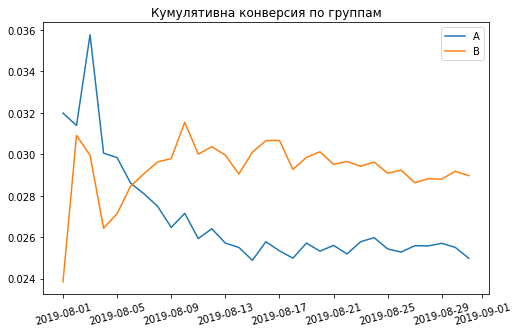

In [18]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.subplots(figsize=(8,5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.xticks(rotation=15)
plt.title('Кумулятивна конверсия по группам')


---

Кумулятивная конверсия по группе В после первый пяти дней теста выше, чем в контрольной группе, динамика сохраняется достаточно равномерно на протяжении всего теста, нет явных вылетов и провалов.

---

Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.

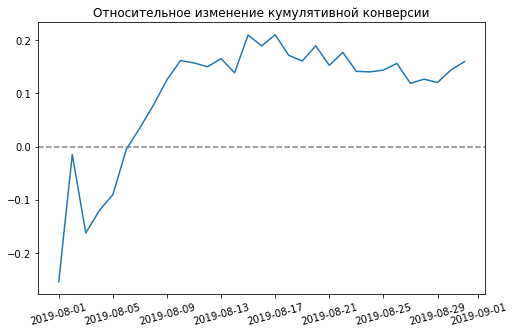

In [19]:
mergedCumulativeConversions = (cumulativeDataA[['date','conversion']]
                               .merge(cumulativeDataB[['date','conversion']],
                                      left_on='date', right_on='date',
                                      how='left', suffixes=['A', 'B']))
plt.subplots(figsize=(8,5))
plt.plot(mergedCumulativeConversions['date'], 
         mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)
#plt.legend()
plt.title('Относительное изменение кумулятивной конверсии')
plt.xticks(rotation=15)
plt.axhline(y=0, color='grey', linestyle='--')


Согласно графика относительного изменения кумулятивной конверсии, по группе В после первый пяти дней теста конверсия выше на 20%, чем в контрольной группе, динамика сохраняется достаточно равномерно на протяжении всего теста, нет явных вылетов и провалов.

---

Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

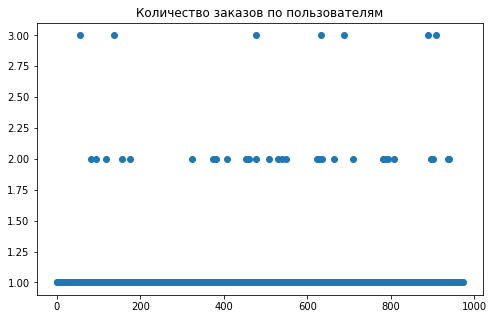

In [20]:
# подготовим таблицу для построения графика
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

ordersByUsers.columns = ['userId', 'orders']
#построим график
plt.subplots(figsize=(8,5))
plt.scatter(pd.Series(range(0,len(ordersByUsers['orders']))),ordersByUsers['orders'])
plt.title('Количество заказов по пользователям');

По графику отмечается единичные пользователи, делающие 2-3 заказа. Основной объем пользователей ограничивается 1 заказом.

---

Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

In [21]:
np.percentile(ordersByUsers['orders'], [90, 95, 99])

array([1., 1., 2.])

Как и отмечали по результату построений графиков, большинстов пользователей ограничивается 1 заказом. Поэтому за отсечку возьмем 95-й перцентиль, 2 и более заказов.

---

Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

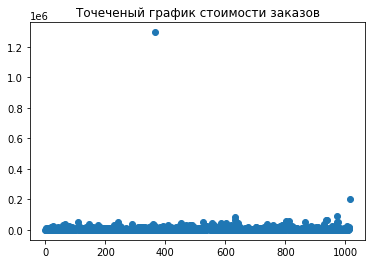

In [22]:
plt.scatter(pd.Series(range(0, len(orders['revenue']))),
            orders['revenue'])
plt.title('Точеченый график стоимости заказов');

Основную неопределенность вносят 2 заказа стоимотсью 200тыс. - 1200тыс. На фоне 2-х заказов, все остальное похоже на шум.

---

Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

In [23]:
np.percentile(orders['revenue'], [90, 95, 99])

array([17990., 26785., 53904.])

Разница в стоимости между 95-м и 99-м перцентилями более чем в 2 раза, в связи с этим возьмем за отсечку заказы дороже 27тыс.

---

Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.<br>
Нулевая гипотеза - нет статистически значимых различий между конверсиями групп. Альтернативная гипотеза - конверсии различны.

In [24]:
'{0:.3f}'.format(st.mannwhitneyu((
        orders[orders['group']=='A'].
        groupby('date', as_index=False).agg({'visitorId':'nunique'})['visitorId'] /
        visitors[visitors['group']=='A']['visitors']
    ),(
        orders[orders['group']=='B'].
        groupby('date', as_index=False).agg({'visitorId':'nunique'})['visitorId'] /
        visitors[visitors['group']=='B'].reset_index()['visitors']
    ))[1])

'0.038'

In [25]:
#рассчитаем разницу между конверсиями
'{0:.3f}'.format(1-(
        orders[orders['group']=='A'].
        groupby('date', as_index=False).agg({'visitorId':'nunique'})['visitorId'] /
        visitors[visitors['group']=='A']['visitors']
    ).mean()/(
        orders[orders['group']=='B'].
        groupby('date', as_index=False).agg({'visitorId':'nunique'})['visitorId'] /
        visitors[visitors['group']=='B'].reset_index()['visitors']
    ).mean())

'0.162'

p-value  меньше 0.05, значит отвергаем нулевую гипотезу. Конверсии между группами статистически различаются, конверсия проверяемой группы выше, чем у контрольной. Конверсия контрольной группы при этом выше на 16%.

---

Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.<br>
Нулевая гипотеза - нет статистически значимых различий между средними чеками групп. Альтернативная гипотеза - средние чеки групп различны.

In [26]:
'{0:.3f}'.format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'] 
    ,orders[orders['group']=='B']['revenue'])[1])

'0.829'

In [27]:
#рассчитаем разницу между средними чеками
'{0:.3f}'.format(1-(orders[orders['group']=='A']['revenue'].mean() 
    /orders[orders['group']=='B']['revenue'].mean()))

'0.223'

p-value значительно выше 0.05, значит отвергнуть нулевую гипотезу не можем. Средние чеки между группами не отличаются. <br>
Но по рассчетам у группы В средний чек выше на 22%.

---

Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.<br>
Нулевая гипотеза - нет статистически значимых различий между конверсиями групп. Альтернативная гипотеза - конверсии различны.

In [28]:
#предварительно создадим список пользователей не удовлетворяющих критериям отбора
abnormalUsers = (pd.concat([
    ordersByUsers[ordersByUsers['orders'] > 1]['userId'],
    orders[orders['revenue'] > 26785]['visitorId']], axis=0)
    .drop_duplicates()
    .sort_values()
)
abnormalUsers.head(5)

568     113298937
1099    148427295
928     204675465
55      249864742
684     358944393
dtype: int64

In [29]:
'{0:.3f}'.format(st.mannwhitneyu((
        orders[(orders['group']=='A') & (np.logical_not(orders['visitorId'].isin(abnormalUsers)))].
        groupby('date', as_index=False).agg({'visitorId':'nunique'})['visitorId'] /
        visitors[visitors['group']=='A']['visitors']
    ),(
         orders[(orders['group']=='B') & (np.logical_not(orders['visitorId'].isin(abnormalUsers)))].
        groupby('date', as_index=False).agg({'visitorId':'nunique'})['visitorId'] /
        visitors[visitors['group']=='B'].reset_index()['visitors']
    ))[1])

'0.043'

In [30]:
#рассчитаем разницу между конверсиями
'{0:.3f}'.format(1-(
        orders[(orders['group']=='A') & (np.logical_not(orders['visitorId'].isin(abnormalUsers)))].
        groupby('date', as_index=False).agg({'visitorId':'nunique'})['visitorId'] /
        visitors[visitors['group']=='A']['visitors']
    ).mean()/(
         orders[(orders['group']=='B') & (np.logical_not(orders['visitorId'].isin(abnormalUsers)))].
        groupby('date', as_index=False).agg({'visitorId':'nunique'})['visitorId'] /
        visitors[visitors['group']=='B'].reset_index()['visitors']
    ).mean())

'0.153'

p-value стал еще меньше, все еще меньше 0.05, значит отвергаем нулевую гипотезу. Конверсии между группами статистически различаются, конверсия проверяемой группы выше, чем у контрольной. Разница между конверсиями почти не изменилась и все еще составляет внушительные 15%.

---

Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.<br>
Нулевая гипотеза - нет статистически значимых различий между средними чеками групп. Альтернативная гипотеза - средние чеки групп различны.

In [31]:
'{0:.3f}'.format(st.mannwhitneyu(
    orders[(orders['group']=='A') & (np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'] 
    ,orders[(orders['group']=='B') & (np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1])

'0.727'

In [32]:
#рассчитаем разницу между средними чеками
'{0:.3f}'.format(1-(
    orders[(orders['group']=='A') & (np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() 
    /orders[(orders['group']=='B') & (np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()))

'-0.035'

p-value стал еще больше, значительно выше 0.05, значит отвергнуть нулевую гипотезу не можем. Средние чеки между группами не отличаются.<br>
Средний чек при этом стал ниже на 3%.

---

Примите решение по результатам теста и объясните его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

###### Выводы:
- имеются статистически значимые различия между конверсиями групп;
- отсутствуют статистически значимые различия между чеками групп;
- график различия конверсий показывыает, что конверсии группы В значительно лучше конверсий группы А и нет никаких тенденций к изменению отношения данных показателей;
- отсутствия в отличии между средними чеками говорит и в целом лучший график по категории В говорит нам, что мы, как минимум, не теряем в среднем чеке на 1 пользователя;
- на основании вышесказанного можно принять, что конверсия группы В выше, средний чек не изменился, тест можно остановить.

## Общие выводы

- загружены библиотеки необходимые для работы и предоставленные для анализа датасеты;
- просмотрено и изучено содержимое датасетов;
- изменен формат колонок с датами, приведены к формату datetime;
- даты очищены от дубликатов;
- согласно метода ICE, наиболее важной гипотезой является гипотеза о необходимости запустить акцию, дающую скидку на товар в день рождения, однако, в связи с тем, что изменение затронет минимальное количество пользователей, по методике RICE данное нововведение занимает середину списка;
- согласно методики RICE, гипотеза о добавлении формы подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок затрагивает всех пользователей сайта, поэтому оценка у данной гипотезы выше. Но и согласно методики ICE данное предположение находится в топ-3, значит стоит рассматривать её одной из первых;
- так же в оба топ-3 вошла гипотеза о добавлении двух новых каналов привлечения трафика, что позволит привлекать на 30% больше пользователей, она затрагивает не так много пользователей, но вносит хороший impact при высокой уверенности в результате;
- с учетом того, что 2 гипотезы вошли в топ-3 - следует остановится на них. Начать стоить с добавления каналов привлечения траффика, поскольку даст новых пользователей, при этом оставит старых без изменений, далее уже собирать базу клиентов для e-mail рассылки;
- имеются статистически значимые различия между конверсиями групп;
- отсутствуют статистически значимые различия между чеками групп;
- график различия конверсий показывыает, что конверсии группы В значительно лучше конверсий группы А и нет никаких тенденций к изменению отношения данных показателей;
- отсутствия в отличии между средними чеками говорит и в целом лучший график по категории В говорит нам, что мы, как минимум, не теряем в среднем чеке на 1 пользователя;
- на основании вышесказанного можно принять, что конверсия группы В выше, средний чек не изменился, тест можно остановить;
- с учетом того, что мы сохранили средний чек, при этом улучшили конверсию почти на 10% необходимо раскатывать изменения на всех пользователей.